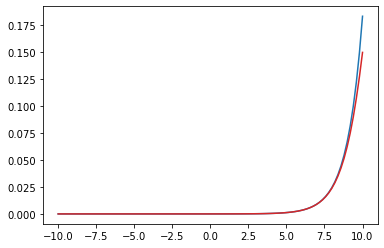

In [6]:
#FUNCIONES DE ACTIVACIÓN PARA REDES NEURONALES MULTICAPA
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit,softmax

class function(object):
    def __init__(self,funcion,derivative=None,rand_init=(0,1)):
        self.F=funcion
        self.D=derivative
        self.Rand_init=rand_init

lineal=function(funcion=lambda x:x,
                derivative=lambda x:1,
                rand_init=(-1,1))

sigm=function(funcion=lambda x: expit(x),
              derivative=lambda x: expit(x)*(1-expit(x)),
              rand_init=(0,1))

tanh=function(funcion=lambda x:(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)),
              derivative=lambda x:1-((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))**2,
              rand_init=(-1,1))

tanh1=function(funcion=lambda x:np.tanh(x),
               derivative=lambda x:1-np.tanh(x)**2,
               rand_init=(-1,1))

relu=function(funcion=lambda x: np.maximum(0, x),
              derivative=lambda x: np.where(x<=0,0,1),
              rand_init=(0,1))

softmaxf=function(funcion=lambda x: softmax(x),
                  derivative=lambda x:softmax(x)*(1-softmax(x)),
                  rand_init=(0,1))


# funciones de coste
mse=function(funcion=lambda Yp, Yr: np.mean((Yp - Yr) ** 2) ,
                 derivative=lambda Yp, Yr: (Yp - Yr))

cross_entropy=function(funcion=lambda yscore,yreal:-np.sum(yreal*np.log(yscore))/yscore.shape[0],
                       derivative=lambda yscore,yreal:yscore-yreal)

Funciones={"relu":relu,
           "sigm":sigm,
           "relu":relu,
           "tanh":tanh,
           "tanh1":tanh1,
           "lineal":lineal,
           "softmax":softmaxf}

Loss={"mse":mse,
      "cross_entropy":cross_entropy}

_x = np.linspace(-10, 10, 100)




plt.plot(_x, softmaxf.F(_x),"tab:blue")
plt.plot(_x, softmaxf.D(_x),"tab:red")
plt.show()



In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


#def one_hot_cols(df,cols_to_one):
#    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
#    return one_hot

def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df



In [17]:
#Hacer aquí la normalizacion de los datos
import csv
estudiantes = pd.read_csv('datasets/Maths.csv', encoding='utf-8' )
dataset1=fit_cols(estudiantes,['sex','school','famsize','Pstatus','Mjob','Fjob','address','reason','guardian','schoolsup','famsup','activities','nursery','higer',],Ordinal)
dataset1
#X=[]
#Y=[]
#with open('datasets/iris.csv') as csvfile:
#    readCSV = csv.reader(csvfile, delimiter=',')
#    for row in readCSV:
#        row=row[0].split(",")
#        X.append([float(row[0])/10,float(row[1])/10,float(row[2])/10,float(row[3])/10])
#
#        if row[4]=='"Setosa"':
#            Y.append([1,0,0])
#        if row[4]=='"Versicolor"':
#            Y.append([0,1,0])
#        if row[4]=='"Virginica"':
#            Y.append([0,0,1])
#
#
#Xtrain=np.array(X)
#Ytrain=np.array(Y)
#Xtrain=Xtrain[1:-1]
#Ytrain=Ytrain[1:-1]
#print(np.shape(Xtrain))
#print(Xtrain)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,...,4,3,4,1,1,3,6,5,6,6
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,...,5,3,3,1,1,3,4,5,5,6
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,...,4,3,2,2,3,3,10,7,8,10
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,...,3,2,2,1,1,5,2,15,14,15
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,20,1.0,1.0,0.0,2,2,3.0,3.0,...,5,5,4,4,5,4,11,9,9,9
391,1.0,1.0,17,1.0,1.0,1.0,3,1,3.0,3.0,...,2,4,5,3,4,2,3,14,16,16
392,1.0,1.0,21,0.0,0.0,1.0,1,1,2.0,2.0,...,5,5,3,3,3,3,3,10,8,7
393,1.0,1.0,18,0.0,1.0,1.0,3,2,3.0,2.0,...,4,4,1,3,4,5,0,11,12,10


In [3]:
# CLASE DE LA CAPA DE LA RED
from IPython.display import clear_output
import time

class neural_layer(object):
    def __init__(self, n_conn, n_neur, activation="relu"):
        self.act = Funciones[activation]
        self.activation=activation
        self.random=self.act.Rand_init  
        self.shape=(n_conn,n_neur)
        self.Initialize()
        
    def show(self,Full=False):
        print(f"Pesos shape:{np.shape(self.W)} bias shape:{np.shape(self.b)} Activation:{self.activation}")
        print(f"Activation:{self.activation}, Random:{self.random}")
        print("______________________")
        if Full:
            print(f"Pesos:")
            print(self.W)
            print("#####")
            print(f"Bias:")
            print(self.b)
            
    def Initialize(self):
        #inicializa los pesos iniciales con aleatorios
        self.b = np.random.uniform(*self.random,(1, self.shape[1]))      
        self.W = np.random.uniform(*self.random,self.shape)
        
        
        
#CLASE RED NEURONAL MULTICAPA        
class Neural_Net(object):
    def __init__(self,Input,loss):
        self.loss = Loss[loss]
        self.Funcion_Loss=loss
        self.Input=Input
        self.NN=None;
              
    def Add_Layer(self,Num_neurons, function):
        if self.NN is None:
            self.NN=[]
            self.NN.append(neural_layer(self.Input,Num_neurons,function))
        else:
            _,L_input=np.shape(self.NN[-1].W)
            self.NN.append(neural_layer(L_input,Num_neurons,function))
            
    def Show_Model(self, Full=False):
        print(f"Input shape:{self.Input}, Loss: {self.Funcion_Loss}")
        for i,L in enumerate(self.NN):
            print(F"Layer_{i}:")
            L.show(Full)
            
            
    # fucnción de predicción (fordware pass)    
    def Predict(self,X):  
      #sólo podemos pasar Numpy  
      sx=np.shape(X)
      X=X.reshape(1,sx[0])
      if self.NN is None:
          print("error in Predict Method ( not NEURAL network available)")
          return 0
        
      out = [(None, X)] #primer data necesario
      # Forward pass
      for l, layer in enumerate(self.NN):
          z = out[-1][1] @ self.NN[l].W + self.NN[l].b
          a = self.NN[l].act.F(z)
          out.append((z, a))
      return out[-1][1]
    
    
    # función retropropagación del error
    def _backward_pass(self, X, Y,lr=0.01):
      sx=np.shape(X)
      sy=np.shape(Y)   
      X=X.reshape(1,sx[0])
      Y=Y.reshape(1,sy[0])

      # Forward pass
      out = [(None, X)] #primer data necesario
      for l, layer in enumerate(self.NN):
            z = out[-1][1] @ self.NN[l].W + self.NN[l].b
            a = self.NN[l].act.F(z)
            out.append((z, a))

      # Backward pass 
      deltas = []
      for l in reversed(range(0, len(self.NN))):
        z = out[l+1][0]
        a = out[l+1][1]
        if l == len(self.NN) - 1:
            deltas.insert(0, self.loss.D(a, Y) * self.NN[l].act.D(a)) # La última capa
        else:
            deltas.insert(0, deltas[0] @ _W.T * self.NN[l-1].act.D(a))
        _W = self.NN[l].W #los pesos en la capa superior
 
        # Gradient descent. actualizamos pesos 
        self.NN[l].b = self.NN[l].b - (deltas[0]* lr)
        self.NN[l].W = self.NN[l].W - (lr * (out[l][1].T @ deltas[0]))
      return out[-1][1]

    # función de entrenamiento de la red
    def Train(self,X,Y,lr=0.01,epoch=10,batch_size=1):
        H_loss = []
        H_acc=[]
        
        # inicializamos las capas neuronales a valores ramdom del rango de la función
        for Layer in self.NN:
            Layer.Initialize()
            
        for i in range(epoch):
            account=0
            epoch_Loss=0
            epoch_Acc=0
            # Entrenemos a la red! con el dataset de validación
            for j in range(len(X)):
                pY = self._backward_pass(X[j,:], Y[j,:],lr)#fila, fila, learning rate
                epoch_Loss+=self.loss.F(pY[0],Y[j,:])
                if (Y[j,:]==np.round(pY)).all():#condicion de acertar
                    epoch_Acc+=1
            H_acc.append(epoch_Acc/len(Y)*100)    
            H_loss.append(epoch_Loss/len(Y))#media del error
            
            #imprimimos por pantalla resultados
            print("Epoch={}, Accurary={} Loss={}".format(i,round(H_acc[-1],3),round(H_loss[-1],7)))
            clear_output(wait=True)
        print("Epoch={}, Accuracy={} Loss={}".format(i,round(H_acc[-1],3),round(H_loss[-1],7)))
        return H_loss,H_acc

    
# VISUALIZACIÓN Y TEST
def Show_Loss_Acc(H_loss,H_acc):
    plt.plot(range(len(H_loss)), H_loss,"tab:blue")
    plt.ylabel("loss function ")
    plt.xlabel("EPOCH NUMBER")
    plt.show()
    plt.plot(range(len(H_acc)), H_acc, "tab:red")
    plt.ylabel("ACCURACY")
    plt.xlabel("EPOCH NUMBER")
    plt.show()
       
def print_predict(neural_net,X,Y):
    for i in range(len(X)):
        sal_float=neural_net.Predict(X[i])
        sal=np.round(sal_float)
        
        if (Y[i]==np.round(sal)).all():
            print("Input:{}-- Real:{} predict: {} predict_float:{}".format(X[i],Y[i],sal,np.round(sal_float,2)))
        else:
            print("\x1b[31m Input:{}-- Real:{} predict: {} predict_float:{}\x1b[0m".format(X[i],Y[i],sal,np.round(sal_float,2)))


        

In [4]:
#DEFINIMOS LOS MODELOs
def Model1():
    red=Neural_Net(Input=4,loss="cross_entropy")
    red.Add_Layer(18,"relu")
    red.Add_Layer(3,"softmax")
    return red

def Model2():
    red=Neural_Net(Input=4,loss="mse")
    red.Add_Layer(8,"tanh")
    red.Add_Layer(3,"sigm")
    return red

def Model3(): 
    red=Neural_Net(Input=4,loss="cross_entropy")
    red.Add_Layer(16,"sigm")
    red.Add_Layer(24,"tanh")
    red.Add_Layer(8,"relu")
    red.Add_Layer(3,"softmax")
    return red

In [5]:
cnn=Model1()
#cnn.Show_Model()
cnn.Show_Model(True)

Input shape:4, Loss: cross_entropy
Layer_0:
Pesos shape:(4, 18) bias shape:(1, 18) Activation:relu
Activation:relu, Random:(0, 1)
______________________
Pesos:
[[0.86745721 0.05998943 0.17086237 0.48126342 0.87638024 0.8207876
  0.21959767 0.92537419 0.13053948 0.50721893 0.84977806 0.68595942
  0.85299717 0.1958458  0.1762356  0.20131533 0.76504768 0.22942774]
 [0.71629967 0.57214855 0.61254776 0.31879545 0.38218942 0.36851811
  0.94292864 0.65838132 0.92006335 0.38006288 0.61230622 0.24607676
  0.56877802 0.45300441 0.24013256 0.54096239 0.66366328 0.74538729]
 [0.55299074 0.20196951 0.38182351 0.68145303 0.33430667 0.78431682
  0.55688807 0.41479605 0.85136663 0.85467814 0.79045953 0.58092643
  0.08381972 0.49497188 0.6648235  0.30540845 0.65150755 0.93728587]
 [0.1762181  0.67842585 0.37066939 0.01365761 0.2583893  0.64327766
  0.46766748 0.47341304 0.26455259 0.74993593 0.31991285 0.67428804
  0.92497113 0.07683379 0.72259801 0.01560119 0.26252084 0.39976486]]
#####
Bias:
[[0.8258

In [6]:




loss,accuracy=cnn.Train(Xtrain,Ytrain,0.2,300)
Show_Loss_Acc(loss,accuracy)


NameError: name 'Xtrain' is not defined

In [18]:
print_predict(cnn,Xtrain,Ytrain)
print("::::::::::::::::::::::::::::")


np.round(cnn.Predict(np.array([0.51,0.35,0.14,0.02])))



Input:[0.49 0.3  0.14 0.02]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.47 0.32 0.13 0.02]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.46 0.31 0.15 0.02]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.5  0.36 0.14 0.02]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.54 0.39 0.17 0.04]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.98 0.02 0.  ]]
Input:[0.46 0.34 0.14 0.03]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.5  0.34 0.15 0.02]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.44 0.29 0.14 0.02]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.49 0.31 0.15 0.01]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.54 0.37 0.15 0.02]-- Real:[1 0 0] predict: [[1. 0. 0.]] predict_float:[[0.99 0.01 0.  ]]
Input:[0.48 0.34 0.1

array([[1., 0., 0.]])